In [16]:
import iris
import iris.plot as iplt
iris.FUTURE.netcdf_promote = True
import matplotlib.pyplot as plt
import cmocean

In [7]:
%matplotlib inline

In [8]:
access_file = 'pr_Amon_ACCESS1-3_historical_r1i1p1_198601-200512.nc'
csiro_file = 'pr_Amon_CSIRO-Mk3-6-0_historical_r1i1p1_198601-200512.nc'

In [9]:
access_cube = iris.load_cube(access_file, 'precipitation_flux')

In [10]:
print(access_cube)

precipitation_flux / (kg m-2 s-1)   (time: 240; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                           x              -               -
          latitude                       -              x               -
          longitude                      -              -               x
     Attributes:
          CDI: Climate Data Interface version 1.7.1 (http://mpimet.mpg.de/cdi)
          CDO: Climate Data Operators version 1.7.1 (http://mpimet.mpg.de/cdo)
          Conventions: CF-1.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_ACCESS1-3_historical_r0i0p0.nc...
          branch_time: 90945.0
          cmor_version: 2.8.0
          comment: at surface; includes both liquid and solid phases from all types of clouds...
          contact: The ACCESS wiki: http://wiki.csiro.au/confluence/display/ACCESS/Home. Contact...
          creation_date: 2012-02-08T06:45:54Z
          exp

In [11]:
access_clim = access_cube.collapsed('time', iris.analysis.MEAN)

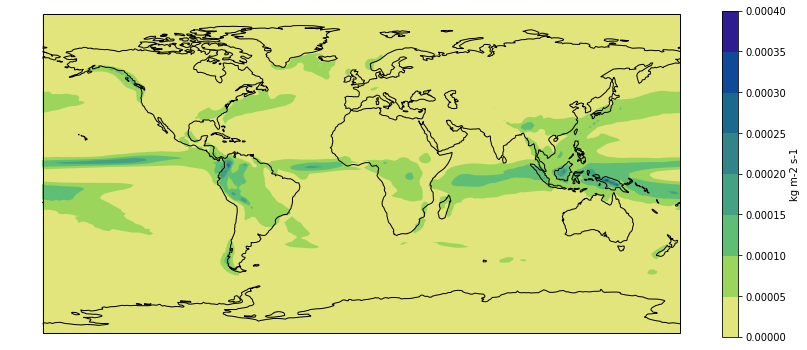

In [20]:
fig = plt.figure(figsize=[15,6])
iplt.contourf(access_clim, cmap=cmocean.cm.haline_r)
plt.gca().coastlines()
#plt.gca().gridlines()
cbar = plt.colorbar()
cbar.set_label(str(access_clim.units))
plt.show()

In [21]:
def convert_pr_units(cube):
    """Convert kg m-2 s-1 to mm day-1"""
    
    assert cube.units == 'kg m-2 s-1'
    cube.data = cube.data * 86400
    cube.units = 'mm day-1'
    
    return cube

In [ ]:
def read_data(fname, variable):
    """Read an input data file"""
    
    cube = iris.load_cube(fname, variable)
    
    